In [16]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import re
from sklearn.svm import SVC

In [17]:
# Load dataset
data = pd.read_csv('/content/balanced_dataset.csv.zip')  # Replace with your dataset path

# Display first few rows
print(data.head())

                                                text  label
0  Talk about posting the same old boring crap!\n...      1
1  More stupidity from the stupidity generator PM...      1
2   suggestion the new name should be calls for c...      0
3  Starving the poor is the goal of deep ecologists.      1
4  re  question were is the space were i explain ...      0


In [18]:
# Basic text cleaning function
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.lower()  # Convert to lowercase
    return text

# Apply preprocessing
data['text'] = data['text'].apply(preprocess_text)

# Display first few rows of the cleaned text
print(data.head())

                                                text  label
0  talk about posting the same old boring crap\np...      1
1  more stupidity from the stupidity generator pm...      1
2   suggestion the new name should be calls for c...      0
3   starving the poor is the goal of deep ecologists      1
4  re  question were is the space were i explain ...      0


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['text'])
y = data['label'].values

In [20]:
data_sampled = data.sample(frac=0.1, random_state=42)  # Use 10% of the data for example
X_sampled = vectorizer.fit_transform(data_sampled['text'])
y_sampled = data_sampled['label'].values


In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils import shuffle

classifier = MultinomialNB()
batch_size = 1000
num_batches = int(len(data) / batch_size)

for i in range(num_batches):
    start = i * batch_size
    end = (i + 1) * batch_size
    X_batch = vectorizer.transform(data['text'][start:end])
    y_batch = data['label'][start:end]
    classifier.partial_fit(X_batch, y_batch, classes=[0, 1])


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [23]:
X_test = X[-batch_size:]
y_test = y[-batch_size:]

In [24]:
#Naive Bayes Classification
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(X_train, y_train)



MultinomialNB()

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = classifier.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 94.99%
Confusion Matrix:
[[18827  1103]
 [  798 17248]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     19930
           1       0.94      0.96      0.95     18046

    accuracy                           0.95     37976
   macro avg       0.95      0.95      0.95     37976
weighted avg       0.95      0.95      0.95     37976

Precision: 0.9398942836902621
Recall: 0.9557796741660202
F1 Score: 0.9477704206390636


In [27]:
#SVM Classification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
from sklearn.svm import LinearSVC

svm_classifier = LinearSVC()
svm_classifier.fit(X_train, y_train)

LinearSVC()

In [29]:
y_pred = svm_classifier.predict(X_test)


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 96.67%
Precision: 0.9703442089920394
Recall: 0.9591599246370387
F1 Score: 0.9647196522126853
Confusion Matrix:
[[19401   529]
 [  737 17309]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     19930
           1       0.97      0.96      0.96     18046

    accuracy                           0.97     37976
   macro avg       0.97      0.97      0.97     37976
weighted avg       0.97      0.97      0.97     37976



In [31]:
#Logistic regression

In [32]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Data visualization
# Word clouds
from wordcloud import WordCloud

In [34]:
toxic_comments = data[data['label'] == 1]['text']
non_toxic_comments = data[data['label'] == 0]['text']

In [35]:
wordcloud_toxic = WordCloud(width=800, height=400, background_color='black').generate(' '.join(toxic_comments))
wordcloud_non_toxic = WordCloud(width=800, height=400, background_color='white').generate(' '.join(non_toxic_comments))

(-0.5, 799.5, 399.5, -0.5)

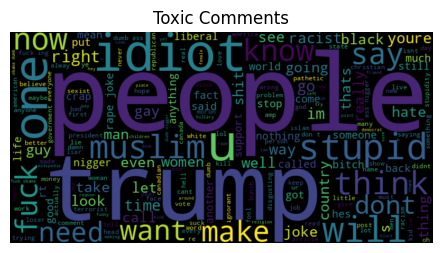

In [36]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_toxic, interpolation='bilinear')
plt.title('Toxic Comments')
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

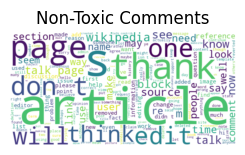

In [37]:
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_non_toxic, interpolation='bilinear')
plt.title('Non-Toxic Comments')
plt.axis('off')

In [38]:
plt.show()

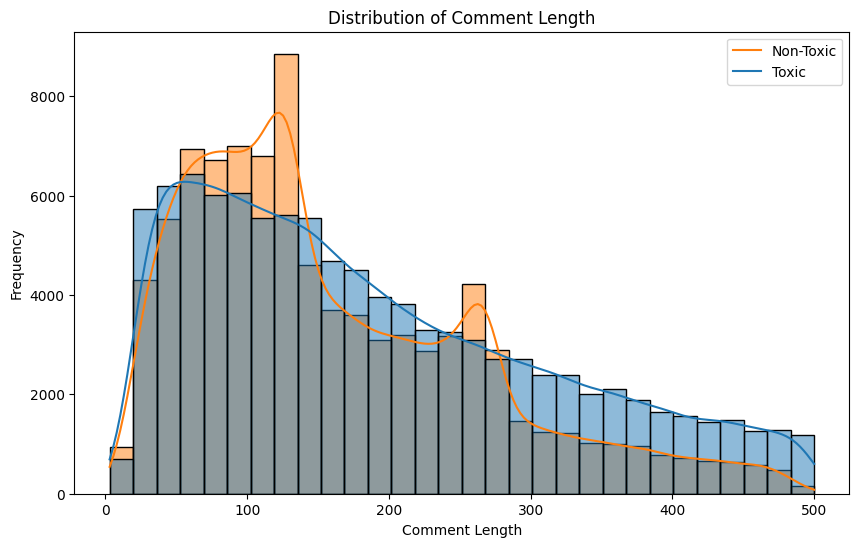

In [39]:
# Histograms
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x=data['text'].apply(len), hue='label', bins=30, kde=True)
plt.title('Distribution of Comment Length')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.legend(['Non-Toxic', 'Toxic'])
plt.show()

In [40]:
# Model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [42]:
# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 96.45%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     19930
           1       0.97      0.96      0.96     18046

    accuracy                           0.96     37976
   macro avg       0.96      0.96      0.96     37976
weighted avg       0.96      0.96      0.96     37976


Confusion Matrix:
[[19363   567]
 [  783 17263]]
